## **DATA SCIENCE MAJOR PROECT**
> Contents

*   Question
*   Importing all the necessary libraries
*   Handling with the data
*   Rearranging the features in the data
*   Handling with the outliers
*   Handling with the null values
*   Final data with the modified features and the modified target
*   Splitting the data into train and test data







## ** Question**

*   **Problem statement**: Create a classification model to predict whether a person makes over $50k a year
*  **Context**: This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry
*   **Dataset** :
https://drive.google.com/file/d/193ND4XKmMSnqdOlbDGP36b5V5s6HcQJb/view?usp=sharing










# **Importing all the necessary Libraries**

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from pandas.api.types import CategoricalDtype 
import missingno as msno
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# **Handling with the data, rearranging the features, handling with null values and outliers**

In [3]:
data=pd.read_csv("adult.csv")
df=data.copy() 
df.head()

,age,workclass,Fnlwgt,education,education_num,marital_status,occupation,realtionship,race,sex,capital_gain,capital_loss,hours_per_week,native_coutry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print("Rows : {} \nColumns : {}".format(df.shape[0],df.shape[1]))

Rows : 32561 
Columns : 15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


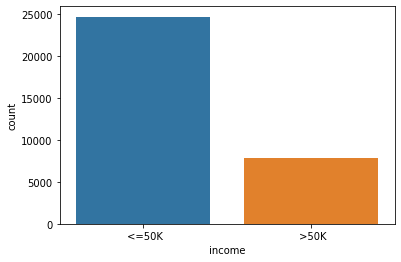

In [5]:
sns.countplot(df["income"])

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
df.describe(include=["object"]).T 

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital_status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
realtionship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native_coutry,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [8]:
df.isnull().sum() 

age               0
workclass         0
Fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
realtionship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_coutry     0
income            0
dtype: int64

In [9]:
df=df.replace(" ?",np.nan) 


In [10]:
df.isnull().sum() 

age                  0
workclass         1836
Fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
realtionship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_coutry      583
income               0
dtype: int64

In [11]:
df.dtypes 

age                int64
workclass         object
Fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
realtionship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_coutry     object
income            object
dtype: object

In [12]:
df["education"].value_counts() 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [13]:
df["education_num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [14]:
df.drop("education",axis=1,inplace=True) 

In [15]:
df.head()

,age,workclass,Fnlwgt,education_num,marital_status,occupation,realtionship,race,sex,capital_gain,capital_loss,hours_per_week,native_coutry,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
 
df["education_num"]=df["education_num"].astype(CategoricalDtype(ordered=True)) 
df["education_num"].head()

0    13
1    13
2     9
3     7
4    13
Name: education_num, dtype: category
Categories (16, int64): [1 < 2 < 3 < 4 ... 13 < 14 < 15 < 16]

In [17]:
df.dtypes

age                  int64
workclass           object
Fnlwgt               int64
education_num     category
marital_status      object
occupation          object
realtionship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_coutry       object
income              object
dtype: object

In [18]:
df.corr()

,age,Fnlwgt,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital_gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.078409,0.054256,1.000000


# **HANDLING WITH OUTLIERS**

In [19]:
df.skew() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age                0.558743
Fnlwgt             1.446980
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64

In [20]:
df.kurtosis() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age                -0.166127
Fnlwgt              6.218811
capital_gain      154.799438
capital_loss       20.376802
hours_per_week      2.916687
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

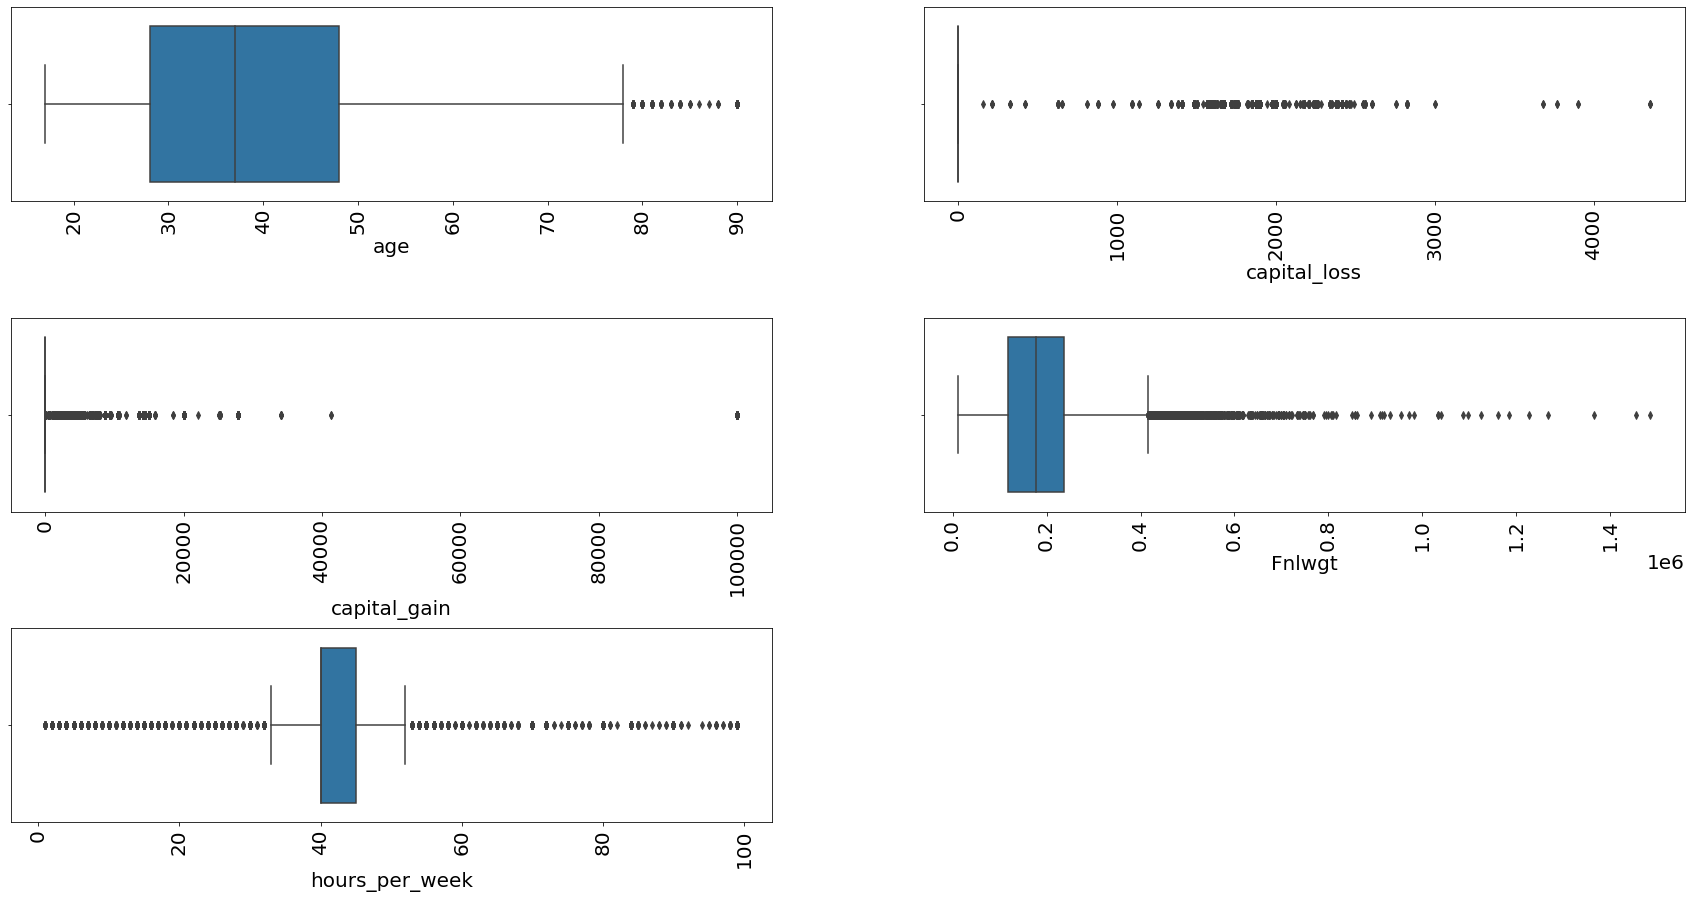

In [21]:
plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 20})
plt.subplot(321)
sns.boxplot(df["age"])
plt.xticks(rotation=90) 

plt.subplot(322)
sns.boxplot(df["capital_loss"])
plt.xticks(rotation=90)

plt.subplot(323)
sns.boxplot(df["capital_gain"])
plt.xticks(rotation=90)

plt.subplot(324)
sns.boxplot(df["Fnlwgt"])
plt.xticks(rotation=90)

plt.subplot(325)
sns.boxplot(df["hours_per_week"])
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.6) 
plt.show()

In [22]:
df_loss_withoutzero=df.loc[df["capital_loss"]!=0,:] 
df_loss_withoutzero.head()

,age,workclass,Fnlwgt,education_num,marital_status,occupation,realtionship,race,sex,capital_gain,capital_loss,hours_per_week,native_coutry,income
23,43,Private,117037,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K
32,45,Private,386940,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
52,47,Private,51835,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
93,30,Private,117747,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
96,48,Self-emp-not-inc,191277,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K


In [23]:
df_gain_withoutzero=df.loc[df["capital_gain"]!=0,:] 
df_gain_withoutzero.head()

,age,workclass,Fnlwgt,education_num,marital_status,occupation,realtionship,race,sex,capital_gain,capital_loss,hours_per_week,native_coutry,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
59,30,Private,188146,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K
60,30,Private,59496,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text major ticklabel objects>)

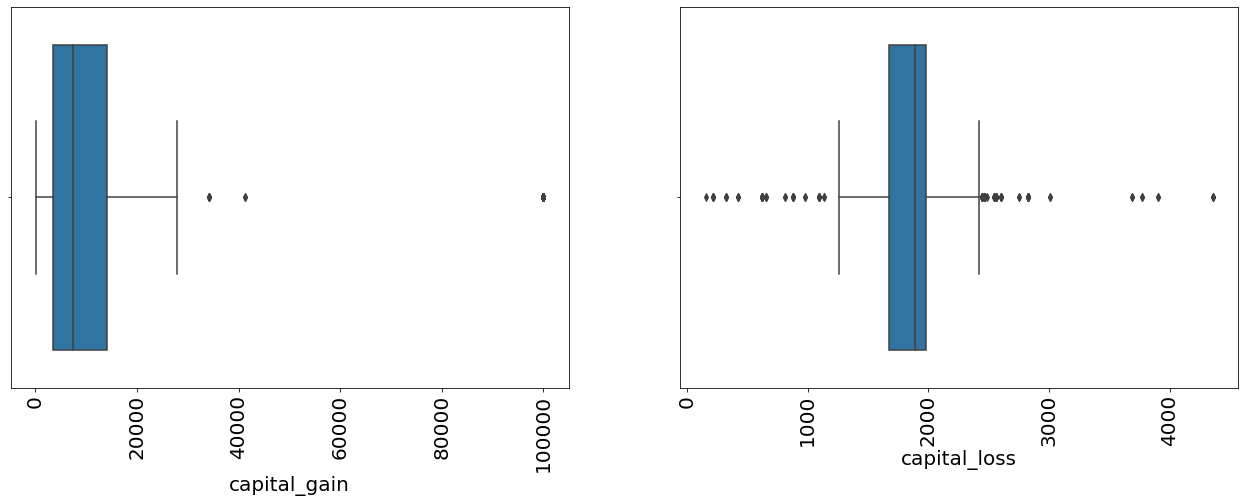

In [24]:
plt.figure(figsize=(22,7))

plt.subplot(121)
sns.boxplot(df_gain_withoutzero["capital_gain"])
plt.xticks(rotation=90) 

plt.subplot(122)
sns.boxplot(df_loss_withoutzero["capital_loss"])
plt.xticks(rotation=90)

In [25]:
numeric_columns=list(df.select_dtypes(include=["int64"]).columns) 
numeric_columns

['age', 'Fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [26]:
lower_limits=[]
upper_limits=[]
IQR_values=[]

for i in range(len(numeric_columns)):
    
    Q1=df[numeric_columns[i]].quantile(0.25) 
    Q3=df[numeric_columns[i]].quantile(0.75) 
    IQR=Q3-Q1 
    IQR_values.append(IQR)
    lower_limit=Q1-(1.5*IQR) 
    lower_limits.append(lower_limit)
    upper_limit=Q3+1.5*IQR 
    upper_limits.append(upper_limit)

In [27]:
IQR_table=pd.DataFrame({"numeric_columns":numeric_columns,"lower_limits":lower_limits,
                        "upper_limits":upper_limits,"IQR_values":IQR_values})
IQR_table 

,numeric_columns,lower_limits,upper_limits,IQR_values
0,age,-2.0,78.0,20.0
1,Fnlwgt,-61009.0,415887.0,119224.0
2,capital_gain,0.0,0.0,0.0
3,capital_loss,0.0,0.0,0.0
4,hours_per_week,32.5,52.5,5.0


In [28]:
Q1_loss=df[df["capital_loss"]!=0]["capital_loss"].quantile(0.25)
Q3_loss=df[df["capital_loss"]!=0]["capital_loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

print("Capital-Loss Lower Limit :",lower_limit_loss)
print("Capital-Loss Upper Limit :",upper_limit_loss)

Q1_gain=df[df["capital_gain"]!=0]["capital_gain"].quantile(0.25)
Q3_gain=df[df["capital_gain"]!=0]["capital_gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
lower_limit_gain=Q1_gain-(1.5*IQR_gain)
upper_limit_gain=Q3_gain+(1.5*IQR_gain)

print("Capital-Gain için Lower Limit :",lower_limit_gain)
print("Capital-Gain için Upper Limit:",upper_limit_gain)

Capital-Loss Lower Limit : 1214.5
Capital-Loss Upper Limit : 2434.5
Capital-Gain için Lower Limit : -12598.5
Capital-Gain için Upper Limit: 30093.5


In [29]:
df_loss_withoutzero[(df_loss_withoutzero["capital_loss"]<lower_limit_loss )|( df_loss_withoutzero["capital_loss"]>upper_limit_loss)]["capital_loss"].shape

(107,)

In [30]:
df_gain_withoutzero[(df_gain_withoutzero["capital_gain"]<lower_limit_gain )|( df_gain_withoutzero["capital_gain"]>upper_limit_gain)]["capital_gain"].shape

(166,)

In [31]:
df_gain_withoutzero["capital_gain"].mode()[0] 

15024

In [32]:
df_loss_withoutzero["capital_loss"].mode()[0]

1902

In [33]:
df[((df["capital_gain"]!=0 )& (df["capital_gain"]<lower_limit_gain )) | ((df["capital_gain"]!=0 )& (df["capital_gain"]>upper_limit_gain ))].head()

,age,workclass,Fnlwgt,education_num,marital_status,occupation,realtionship,race,sex,capital_gain,capital_loss,hours_per_week,native_coutry,income
106,17,NaN,304873,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
1246,54,Self-emp-inc,166459,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K


In [34]:
outlier_gain=((df["capital_gain"]!=0 )& (df["capital_gain"]<lower_limit_gain )) | ((df["capital_gain"]!=0 )& (df["capital_gain"]>upper_limit_gain ))
outlier_loss=((df["capital_loss"]!=0 )& (df["capital_loss"]<lower_limit_loss)) | ((df["capital_loss"]!=0 )& (df["capital_loss"]>upper_limit_loss ))
df.loc[outlier_gain,"capital_gain"]=df_gain_withoutzero["capital_gain"].mode()[0]
df.loc[outlier_loss,"capital_loss"]=df_loss_withoutzero["capital_loss"].mode()[0]

In [35]:
print("outlier number for age: {}".format(df[(df["age"]<(lower_limits[0]))|(df["age"]>(upper_limits[0]))].shape[0]))

outlier number for age: 143


In [36]:
print("outlier number for hours-per-week : {}".format(df[(df["hours_per_week"]<(lower_limits[4]))|(df["hours_per_week"]>(upper_limits[4]))].shape[0]))

outlier number for hours-per-week : 9008


In [37]:
df.drop(df[df["age"]>upper_limits[0]].index,inplace=True) 

In [38]:
print("Final Weight Outlier Number :{}".format(df[(df["Fnlwgt"]<(lower_limits[1]))|(df["Fnlwgt"]>(upper_limits[1]))].shape[0]))

Final Weight Outlier Number :991


In [39]:
df.drop(df[df["Fnlwgt"]>900000].index,inplace=True) 

In [40]:
numeric_describe_2=df.describe().T

In [41]:
df.head()

,age,workclass,Fnlwgt,education_num,marital_status,occupation,realtionship,race,sex,capital_gain,capital_loss,hours_per_week,native_coutry,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [42]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,32398.0,38.384592,13.332532,17.0,28.0,37.0,47.00,78.0
Fnlwgt,32398.0,189341.510062,103056.141558,12285.0,117847.5,178469.5,236988.75,889965.0
capital_gain,32398.0,655.349898,2693.989598,0.0,0.0,0.0,0.00,27828.0
capital_loss,32398.0,87.256096,397.455240,0.0,0.0,0.0,0.00,2415.0
hours_per_week,32398.0,40.491357,12.297511,1.0,40.0,40.0,45.00,99.0


# **Handling with missing values**


---





In [43]:
df.isnull().sum() 

age                  0
workclass         1800
Fnlwgt               0
education_num        0
marital_status       0
occupation        1807
realtionship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_coutry      580
income               0
dtype: int64

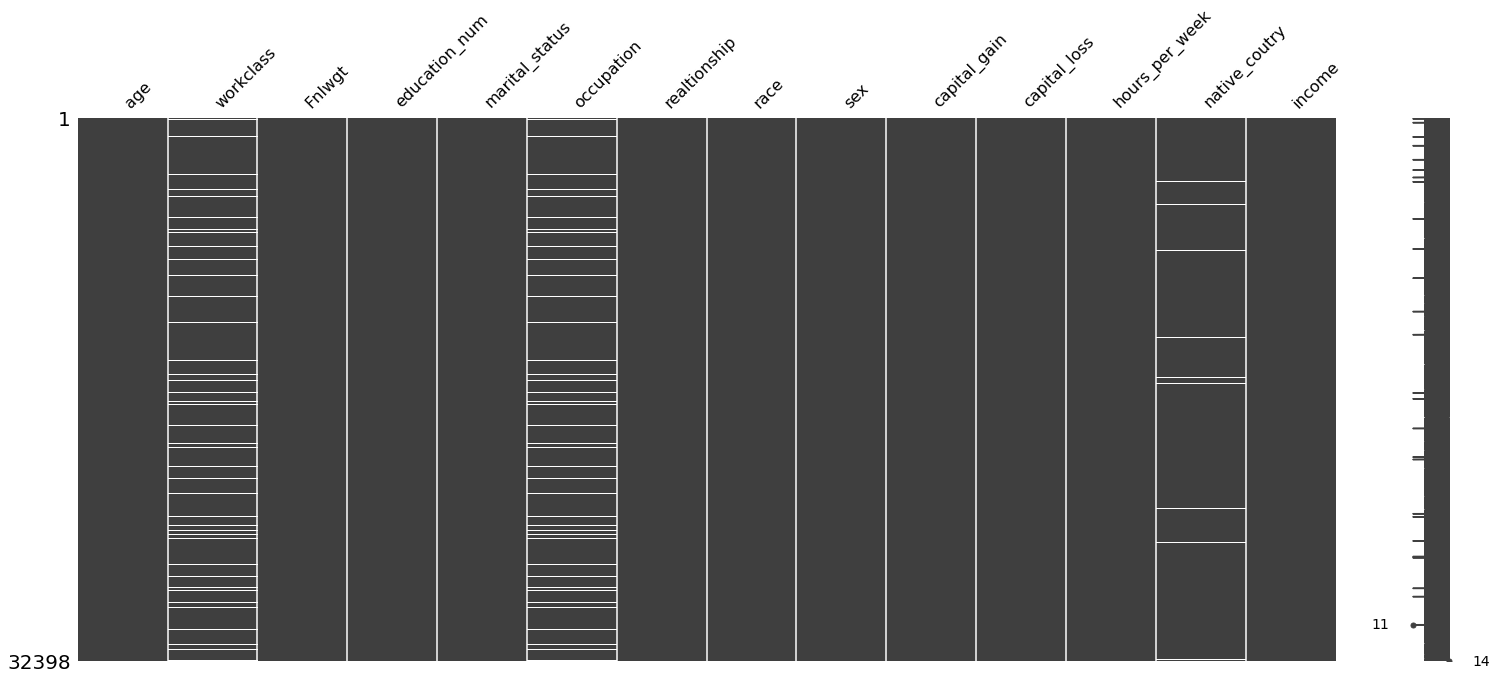

In [44]:
 
msno.matrix(df)

In [45]:
for i in ["occupation","workclass","native_coutry"]:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [46]:
df.isnull().sum().sum()

0

In [47]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,32398.0,38.384592,13.332532,17.0,28.0,37.0,47.00,78.0
Fnlwgt,32398.0,189341.510062,103056.141558,12285.0,117847.5,178469.5,236988.75,889965.0
capital_gain,32398.0,655.349898,2693.989598,0.0,0.0,0.0,0.00,27828.0
capital_loss,32398.0,87.256096,397.455240,0.0,0.0,0.0,0.00,2415.0
hours_per_week,32398.0,40.491357,12.297511,1.0,40.0,40.0,45.00,99.0


# **HANDLING WITH CATEGORICAL DATA**

In [48]:
df.head()
df_new=df.copy()

In [49]:
df_new=pd.get_dummies(df_new,columns=["sex","income"],drop_first=True) 

In [50]:
df_new.head()

,age,workclass,Fnlwgt,education_num,marital_status,occupation,realtionship,race,capital_gain,capital_loss,hours_per_week,native_coutry,sex_ Male,income_ >50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0


In [51]:
df_new.rename({"gender_Male":"gender","income_>50K":"income"},axis=1,inplace=True)

In [52]:
df_new=pd.get_dummies(df_new,columns=["workclass","marital_status","occupation","realtionship","race","native_coutry"])

In [53]:
df_new.head()

,age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Male,income_ >50K,workclass_ Federal-gov,workclass_ Local-gov,...,native_coutry_ Portugal,native_coutry_ Puerto-Rico,native_coutry_ Scotland,native_coutry_ South,native_coutry_ Taiwan,native_coutry_ Thailand,native_coutry_ Trinadad&Tobago,native_coutry_ United-States,native_coutry_ Vietnam,native_coutry_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_new.columns 

Index(['age', 'Fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'sex_ Male', 'income_ >50K', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'o

In [55]:
df_new.shape

(32398, 89)

# **SPLITTING DATA AS TRAIN AND TEST**

In [56]:
df_new.head()

,age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Male,income_ >50K,workclass_ Federal-gov,workclass_ Local-gov,...,native_coutry_ Portugal,native_coutry_ Puerto-Rico,native_coutry_ Scotland,native_coutry_ South,native_coutry_ Taiwan,native_coutry_ Thailand,native_coutry_ Trinadad&Tobago,native_coutry_ United-States,native_coutry_ Vietnam,native_coutry_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_new["income_ >50K"].value_counts()

0    24586
1     7812
Name: income_ >50K, dtype: int64

In [58]:
X=df_new.drop(columns=["income_ >50K"],axis=1)
X["education_num"]=X["education_num"].astype("int") 

In [59]:
y=df_new["income_ >50K"]

In [60]:
X.head()


,age,Fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_coutry_ Portugal,native_coutry_ Puerto-Rico,native_coutry_ Scotland,native_coutry_ South,native_coutry_ Taiwan,native_coutry_ Thailand,native_coutry_ Trinadad&Tobago,native_coutry_ United-States,native_coutry_ Vietnam,native_coutry_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X_new=X.copy()
y_new=y.copy()

# **WITH-OUT BALANCING THE DATA**

In [62]:

Counter(y)

Counter({0: 24586, 1: 7812})

In [63]:
X_train, X_test, y_train, y_test_no = train_test_split(X, y) 

In [64]:
print("X_train row number :",X_train.shape[0])
print("X_test row number :",X_test.shape[0])
print("y_train row number :",y_train.shape[0])
print("y_test row number :",y_test_no.shape[0])

X_train row number : 24298
X_test row number : 8100
y_train row number : 24298
y_test row number : 8100


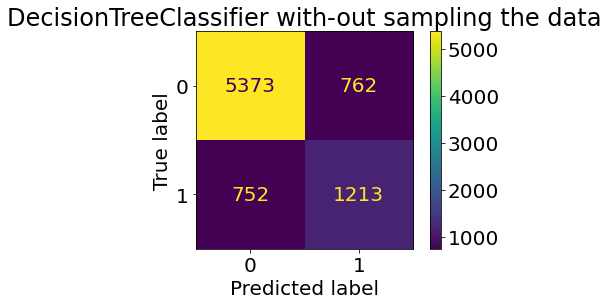

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6135
           1       0.61      0.62      0.62      1965

    accuracy                           0.81      8100
   macro avg       0.75      0.75      0.75      8100
weighted avg       0.81      0.81      0.81      8100





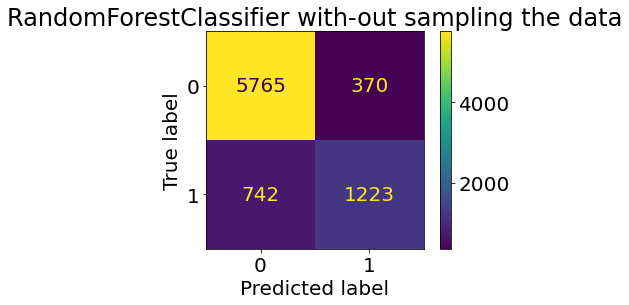

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6135
           1       0.77      0.62      0.69      1965

    accuracy                           0.86      8100
   macro avg       0.83      0.78      0.80      8100
weighted avg       0.86      0.86      0.86      8100





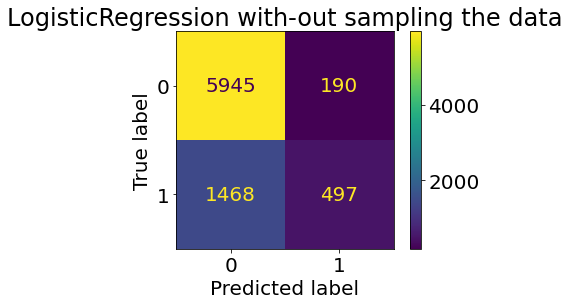

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6135
           1       0.72      0.25      0.37      1965

    accuracy                           0.80      8100
   macro avg       0.76      0.61      0.63      8100
weighted avg       0.78      0.80      0.76      8100





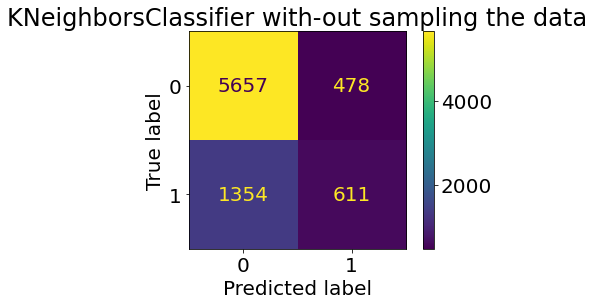

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      6135
           1       0.56      0.31      0.40      1965

    accuracy                           0.77      8100
   macro avg       0.68      0.62      0.63      8100
weighted avg       0.75      0.77      0.75      8100





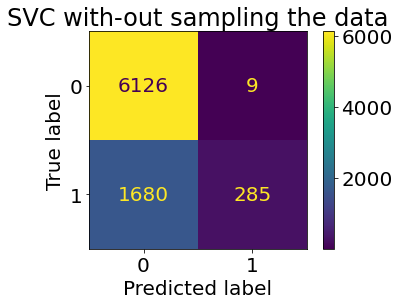

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6135
           1       0.97      0.15      0.25      1965

    accuracy                           0.79      8100
   macro avg       0.88      0.57      0.57      8100
weighted avg       0.83      0.79      0.73      8100



In [65]:

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred_D_no=clf.predict(X_test)
cm=confusion_matrix(y_test_no,y_pred_D_no)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('DecisionTreeClassifier with-out sampling the data')
plt.show()

print(classification_report(y_test_no,y_pred_D_no))
print()
print()
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_R_no=clf.predict(X_test)
cm=confusion_matrix(y_test_no,y_pred_R_no)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('RandomForestClassifier with-out sampling the data')
plt.show()

print(classification_report(y_test_no,y_pred_R_no))
print()
print()
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred_L_no=clf.predict(X_test)
cm=confusion_matrix(y_test_no,y_pred_L_no)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('LogisticRegression with-out sampling the data')
plt.show()

print(classification_report(y_test_no,y_pred_L_no))
print()
print()
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred_K_no=clf.predict(X_test)
cm=confusion_matrix(y_test_no,y_pred_K_no)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('KNeighborsClassifier with-out sampling the data')
plt.show()

print(classification_report(y_test_no,y_pred_K_no))
print()
print()
clf=SVC()
clf.fit(X_train,y_train)
y_pred_S_no=clf.predict(X_test)
cm=confusion_matrix(y_test_no,y_pred_S_no)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVC with-out sampling the data')
plt.show()

print(classification_report(y_test_no,y_pred_S_no))

# **UNDERSAMPLING THE DATA**

In [66]:
random_majority_indices=np.random.choice(df_new[df_new["income_ >50K"]==0].index,
                                        len(df_new[df_new["income_ >50K"]==1]),
                                        replace=False)

In [67]:
minority_class_indices=df_new[df_new["income_ >50K"]==1].index
print(minority_class_indices)

Int64Index([    7,     8,     9,    10,    11,    14,    19,    20,    25,
               27,
            ...
            32530, 32532, 32533, 32536, 32538, 32539, 32545, 32554, 32557,
            32560],
           dtype='int64', length=7812)


In [68]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [69]:
under_sample=df_new.loc[under_sample_indices]

In [70]:
X=under_sample.drop(columns=["income_ >50K"],axis=1)
X["education_num"]=X["education_num"].astype("int")
y=under_sample["income_ >50K"]

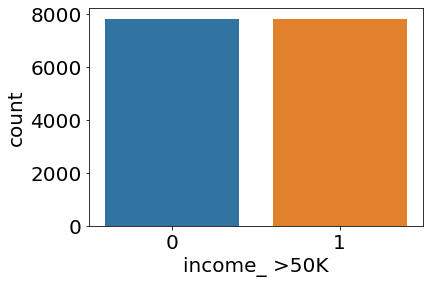

In [71]:
sns.countplot(x="income_ >50K",data=under_sample)

In [72]:
X_train, X_test, y_train, y_test_u = train_test_split(X, y) 
Counter(y)

Counter({0: 7812, 1: 7812})

In [73]:
print("X_train row number :",X_train.shape[0])
print("X_test row number :",X_test.shape[0])
print("y_train row number :",y_train.shape[0])
print("y_test row number :",y_test_u.shape[0])

X_train row number : 11718
X_test row number : 3906
y_train row number : 11718
y_test row number : 3906


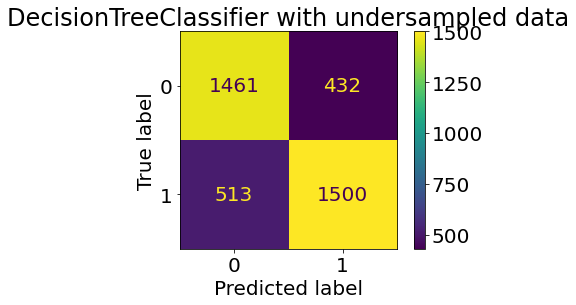

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1893
           1       0.78      0.75      0.76      2013

    accuracy                           0.76      3906
   macro avg       0.76      0.76      0.76      3906
weighted avg       0.76      0.76      0.76      3906





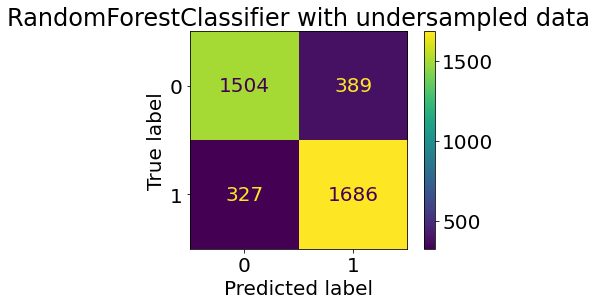

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1893
           1       0.81      0.84      0.82      2013

    accuracy                           0.82      3906
   macro avg       0.82      0.82      0.82      3906
weighted avg       0.82      0.82      0.82      3906





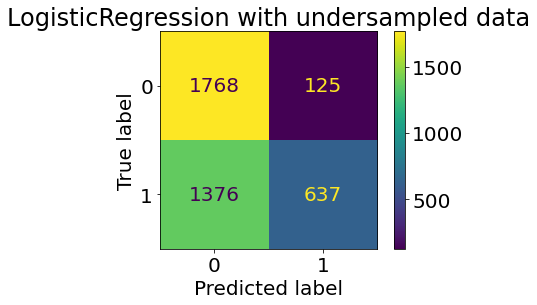

              precision    recall  f1-score   support

           0       0.56      0.93      0.70      1893
           1       0.84      0.32      0.46      2013

    accuracy                           0.62      3906
   macro avg       0.70      0.63      0.58      3906
weighted avg       0.70      0.62      0.58      3906





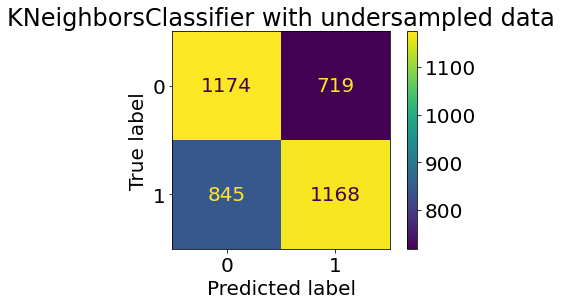

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1893
           1       0.62      0.58      0.60      2013

    accuracy                           0.60      3906
   macro avg       0.60      0.60      0.60      3906
weighted avg       0.60      0.60      0.60      3906





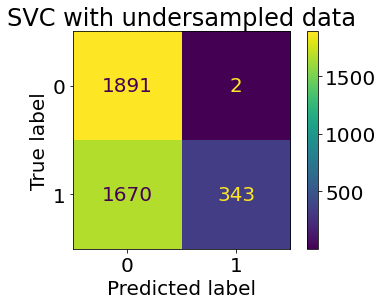

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1893
           1       0.99      0.17      0.29      2013

    accuracy                           0.57      3906
   macro avg       0.76      0.58      0.49      3906
weighted avg       0.77      0.57      0.49      3906



In [74]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred_D_u=clf.predict(X_test)
cm=confusion_matrix(y_test_u,y_pred_D_u)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('DecisionTreeClassifier with undersampled data')
plt.show()


print(classification_report(y_test_u,y_pred_D_u))

print()
print()

clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_R_u=clf.predict(X_test)
cm=confusion_matrix(y_test_u,y_pred_R_u)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('RandomForestClassifier with undersampled data')
plt.show()

print(classification_report(y_test_u,y_pred_R_u))

print()
print()

clf=LogisticRegression(max_iter=5000)
clf.fit(X_train,y_train)
y_pred_L_u=clf.predict(X_test)
cm=confusion_matrix(y_test_u,y_pred_L_u)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('LogisticRegression with undersampled data')
plt.show()

print(classification_report(y_test_u,y_pred_L_u))
print()
print()

clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred_K_u=clf.predict(X_test)
cm=confusion_matrix(y_test_u,y_pred_K_u)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('KNeighborsClassifier with undersampled data')
plt.show()

print(classification_report(y_test_u,y_pred_K_u))
print()
print()

clf=SVC()
clf.fit(X_train,y_train)
y_pred_S_u=clf.predict(X_test)
cm=confusion_matrix(y_test_u,y_pred_S_u)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVC with undersampled data')
plt.show()

print(classification_report(y_test_u,y_pred_S_u))

# **OVERSAMPLING THE DATA**

In [75]:
sm = SMOTE(random_state=42)
X_new, y_new = sm.fit_resample(X_new, y_new)
Counter(y_new)

Counter({0: 24586, 1: 24586})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


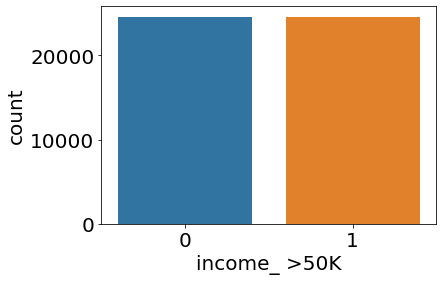

In [76]:
sns.countplot(y_new)

In [77]:

X_train, X_test, y_train, y_test_o = train_test_split(X_new, y_new) 
print("X_train row number :",X_train.shape[0])
print("X_test row number :",X_test.shape[0])
print("y_train row number :",y_train.shape[0])
print("y_test row number :",y_test_o.shape[0])

X_train row number : 36879
X_test row number : 12293
y_train row number : 36879
y_test row number : 12293


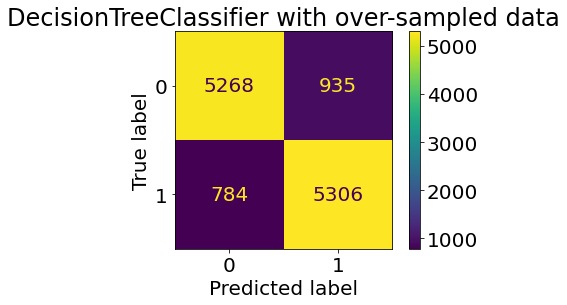

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6203
           1       0.85      0.87      0.86      6090

    accuracy                           0.86     12293
   macro avg       0.86      0.86      0.86     12293
weighted avg       0.86      0.86      0.86     12293





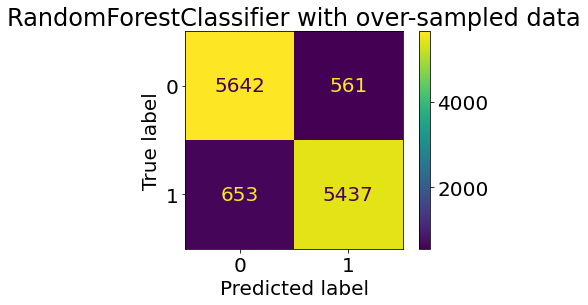

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      6203
           1       0.91      0.89      0.90      6090

    accuracy                           0.90     12293
   macro avg       0.90      0.90      0.90     12293
weighted avg       0.90      0.90      0.90     12293





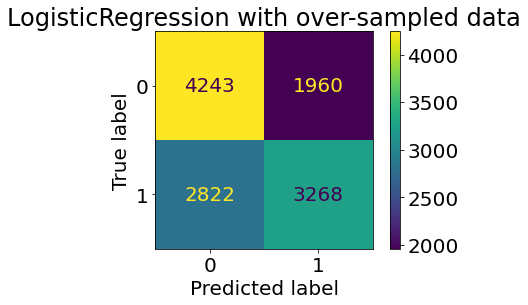

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      6203
           1       0.63      0.54      0.58      6090

    accuracy                           0.61     12293
   macro avg       0.61      0.61      0.61     12293
weighted avg       0.61      0.61      0.61     12293





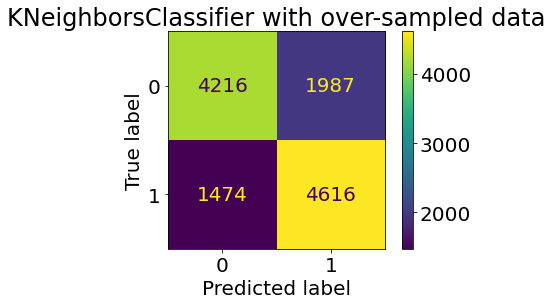

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      6203
           1       0.70      0.76      0.73      6090

    accuracy                           0.72     12293
   macro avg       0.72      0.72      0.72     12293
weighted avg       0.72      0.72      0.72     12293





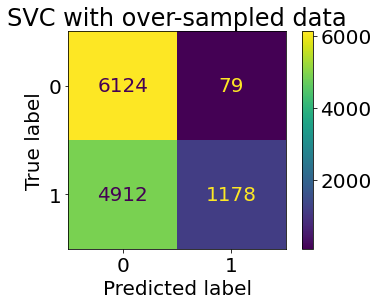

              precision    recall  f1-score   support

           0       0.55      0.99      0.71      6203
           1       0.94      0.19      0.32      6090

    accuracy                           0.59     12293
   macro avg       0.75      0.59      0.52     12293
weighted avg       0.74      0.59      0.52     12293



In [78]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred_D_o=clf.predict(X_test)
cm=confusion_matrix(y_test_o,y_pred_D_o)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('DecisionTreeClassifier with over-sampled data')
plt.show()
print(classification_report(y_test_o,y_pred_D_o))
print()
print()


clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_R_o=clf.predict(X_test)
cm=confusion_matrix(y_test_o,y_pred_R_o)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('RandomForestClassifier with over-sampled data')
plt.show()

print(classification_report(y_test_o,y_pred_R_o))

print()
print()

clf=LogisticRegression(max_iter=5000)
clf.fit(X_train,y_train)
y_pred_L_o=clf.predict(X_test)
cm=confusion_matrix(y_test_o,y_pred_L_o)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('LogisticRegression with over-sampled data')
plt.show()

print(classification_report(y_test_o,y_pred_L_o))

print()
print()

clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred_K_o=clf.predict(X_test)
cm=confusion_matrix(y_test_o,y_pred_K_o)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('KNeighborsClassifier with over-sampled data')
plt.show()

print(classification_report(y_test_o,y_pred_K_o))

print()
print()
clf=SVC()
clf.fit(X_train,y_train)
y_pred_S_o=clf.predict(X_test)
cm=confusion_matrix(y_test_o,y_pred_S_o)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('SVC with over-sampled data')
plt.show()

print(classification_report(y_test_o,y_pred_S_o))

In [82]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


0.8501842653420926

In [96]:
print('************************************Final Results after oversampling the data**********************************************')
print()
results={
    "Algorithm":["Decision Tree","Random Forest","Logistic Regression","KNN Classifier","SVC Classifier"],
    "Precision_Score":[precision_score(y_test_o,y_pred_D_o),precision_score(y_test_o,y_pred_R_o),precision_score(y_test_o,y_pred_L_o),precision_score(y_test_o,y_pred_K_o),precision_score(y_test_o,y_pred_S_o)],
       "f1_Score":[f1_score(y_test_o,y_pred_D_o),f1_score(y_test_o,y_pred_R_o),f1_score(y_test_o,y_pred_L_o),f1_score(y_test_o,y_pred_K_o),f1_score(y_test_o,y_pred_S_o)],
     "Recall_Score":[recall_score(y_test_o,y_pred_D_o),recall_score(y_test_o,y_pred_R_o),recall_score(y_test_o,y_pred_L_o),recall_score(y_test_o,y_pred_K_o),recall_score(y_test_o,y_pred_S_o)],
          "Percentage of misclassification":[(1-accuracy_score(y_test_o,y_pred_D_o))*100,(1-accuracy_score(y_test_o,y_pred_R_o))*100,(1-accuracy_score(y_test_o,y_pred_L_o))*100,(1-accuracy_score(y_test_o,y_pred_K_o))*100,(1-accuracy_score(y_test_o,y_pred_S_o))*100],

      "Accuracy":[accuracy_score(y_test_o,y_pred_D_o),accuracy_score(y_test_o,y_pred_R_o),accuracy_score(y_test_o,y_pred_L_o),accuracy_score(y_test_o,y_pred_K_o),accuracy_score(y_test_o,y_pred_S_o)]}
                                                                                                                                                                                   
results_df=pd.DataFrame(results)
results_df=results_df.sort_values(ascending=False,by="Accuracy")
results_df.head()

************************************Final Results after oversampling the data**********************************************



,Algorithm,Precision_Score,f1_Score,Recall_Score,Percentage of misclassification,Accuracy
1,Random Forest,0.906469,0.899570,0.892775,9.875539,0.901245
0,Decision Tree,0.850184,0.860595,0.871264,13.983568,0.860164
3,KNN Classifier,0.699076,0.727330,0.757964,28.154234,0.718458
2,Logistic Regression,0.625096,0.577487,0.536617,38.900187,0.610998
4,SVC Classifier,0.937152,0.320675,0.193432,40.600342,0.593997


In [91]:
print('************************************Final Results after undersampling the data**********************************************')
print()
results1=pd.DataFrame({
    "Algorithm":["Decision Tree","Random Forest","Logistic Regression","KNN Classifier","SVC Classifier"],
    "Precision_Score":[precision_score(y_test_u,y_pred_D_u),precision_score(y_test_u,y_pred_R_u),precision_score(y_test_u,y_pred_L_u),precision_score(y_test_u,y_pred_K_u),precision_score(y_test_u,y_pred_S_u)],
       "f1_Score":[f1_score(y_test_u,y_pred_D_u),f1_score(y_test_u,y_pred_R_u),f1_score(y_test_u,y_pred_L_u),f1_score(y_test_u,y_pred_K_u),f1_score(y_test_u,y_pred_S_u)],
     "Recall_Score":[recall_score(y_test_u,y_pred_D_u),recall_score(y_test_u,y_pred_R_u),recall_score(y_test_u,y_pred_L_u),recall_score(y_test_u,y_pred_K_u),recall_score(y_test_u,y_pred_S_u)],
     "Percentage of misclassification":[(1-accuracy_score(y_test_u,y_pred_D_u))*100,(1-accuracy_score(y_test_u,y_pred_R_u))*100,(1-accuracy_score(y_test_u,y_pred_L_u))*100,(1-accuracy_score(y_test_u,y_pred_K_u))*100,(1-accuracy_score(y_test_u,y_pred_S_u))*100],
      "Accuracy":[accuracy_score(y_test_u,y_pred_D_u),accuracy_score(y_test_u,y_pred_R_u),accuracy_score(y_test_u,y_pred_L_u),accuracy_score(y_test_u,y_pred_K_u),accuracy_score(y_test_u,y_pred_S_u)]})
                                                                                                                                                                                   

results1.sort_values(ascending=False,by="Accuracy")

************************************Final Results after undersampling the data**********************************************



,Algorithm,Precision_Score,f1_Score,Recall_Score,Percentage of misclassification,Accuracy
1,Random Forest,0.812530,0.824853,0.837556,18.330773,0.816692
0,Decision Tree,0.776398,0.760456,0.745156,24.193548,0.758065
2,Logistic Regression,0.835958,0.459099,0.316443,38.428059,0.615719
3,KNN Classifier,0.618972,0.598974,0.580229,40.040963,0.599590
4,SVC Classifier,0.994203,0.290925,0.170392,42.805940,0.571941


In [97]:
print('THE MODEL WITH THE BEST ACCURACY IS RANDOM FOREST CLASSIFIER WITH ACCURACY OF {}'.format(accuracy_score(y_test_o,y_pred_R_o)))

THE MODEL WITH THE BEST ACCURACY IS RANDOM FOREST CLASSIFIER WITH ACCURACY OF 0.9012446107540877
